In [9]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
response = requests.get("http://www.mse.mn/mn/company/90")

In [11]:
soup = BeautifulSoup(response.content)

In [12]:
result = soup.find_all("div", {"class": "col-lg-6 col-md-6"})

In [15]:
result[0]

<div class="col-lg-6 col-md-6">
<ul>
<li>Өмнөх өдрийн хаалт: <b>1,779.00</b></li>
<li>Нээлтийн ханш: <b>1,785.00</b></li>
<li>Хаалтын ханш: <b> 1,785.00 </b></li>
<li>Тухайн өдрийн VWAP: <b>1,784.92</b></li>
<li>Авах дээд үнэ: <b>1,784.00 x 1,376</b></li>
<li>Зарах доод үнэ: <b>1,789.00 x 817</b></li>
<li>Нийт гаргасан хувьцаа: <b>1,064,181,553</b></li>
<li>Эргэлтэд гаргасан хувьцаа: <b>1,062,974,743</b></li>
</ul>
</div>

In [29]:
a = soup.find_all('b')[6].text

In [38]:
a = a.split(",")[0]+a.split(",")[1]+a.split(",")[2]+a.split(",")[3]

In [39]:
int(a)

1064181553

In [8]:
result

NameError: name 'result' is not defined

In [86]:
apu_stock_df = pd.read_csv("apuStock.csv", thousands=",")
apu_stock_df = apu_stock_df.drop(columns ="volume", axis=1)

In [87]:
apu_stock_df

,date,value
0,2007-01-03,3.20000
1,2007-01-04,3.20000
2,2007-01-08,3.50000
3,2007-01-10,3.50000
4,2007-01-11,3.50000
...,...,...
3277,2021-12-06,1569.00000
3278,2021-12-07,1597.00000
3279,2021-12-08,1650.00000
3280,2021-12-09,1705.00000


In [88]:
import matplotlib.pyplot as plt

2021-12-13 09:26:30.357 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-13 09:26:30.697 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'APU Stock')

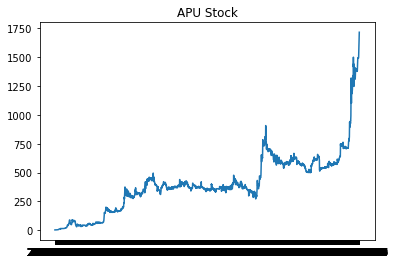

In [37]:
plt.plot(apu_stock_df['date'], apu_stock_df['value'])
plt.title("APU Stock")

In [89]:
apu_stock_df['date'] = pd.to_datetime(apu_stock_df['date'])

In [90]:
apu_stock_df

,date,value
0,2007-01-03,3.20000
1,2007-01-04,3.20000
2,2007-01-08,3.50000
3,2007-01-10,3.50000
4,2007-01-11,3.50000
...,...,...
3277,2021-12-06,1569.00000
3278,2021-12-07,1597.00000
3279,2021-12-08,1650.00000
3280,2021-12-09,1705.00000


In [91]:
apu_stock_df['date'] == "2007-01-08"

0       False
1       False
2        True
3       False
4       False
        ...  
3277    False
3278    False
3279    False
3280    False
3281    False
Name: date, Length: 3282, dtype: bool

In [92]:
apu_stock_df[(apu_stock_df['date'] >= "2007-01-08") & (apu_stock_df['date'] <= "2008-01-08")]

,date,value
2,2007-01-08,3.50000
3,2007-01-10,3.50000
4,2007-01-11,3.50000
5,2007-01-16,3.50000
6,2007-01-17,3.51000
...,...,...
108,2007-12-26,19.00000
109,2007-12-27,19.00000
110,2008-01-03,19.00000
111,2008-01-07,19.00000


In [62]:
def date_setter(min_year, min_month, min_day, max_year, max_month, max_day):
    apu_stock_df = pd.read_csv("apuStock.csv", thousands=",")
    apu_stock_df = apu_stock_df.drop(columns ="volume", axis=1)
    apu_stock_df['date'] = pd.to_datetime(apu_stock_df['date'])
    min_date = pd.to_datetime(str(min_year)+"-"+str(min_month)+"-"+str(min_day))
    max_date = pd.to_datetime(str(max_year)+"-"+str(max_month)+"-"+str(max_day))
    apu_stock_df = apu_stock_df[(apu_stock_df['date'] >= min_date) & (apu_stock_df['date'] <= max_date)]
    plt.plot(apu_stock_df['date'], apu_stock_df['value'])
    plt.title("APU Stock")
    plt.xlabel("Date")
    plt.ylabel("Value")
    return

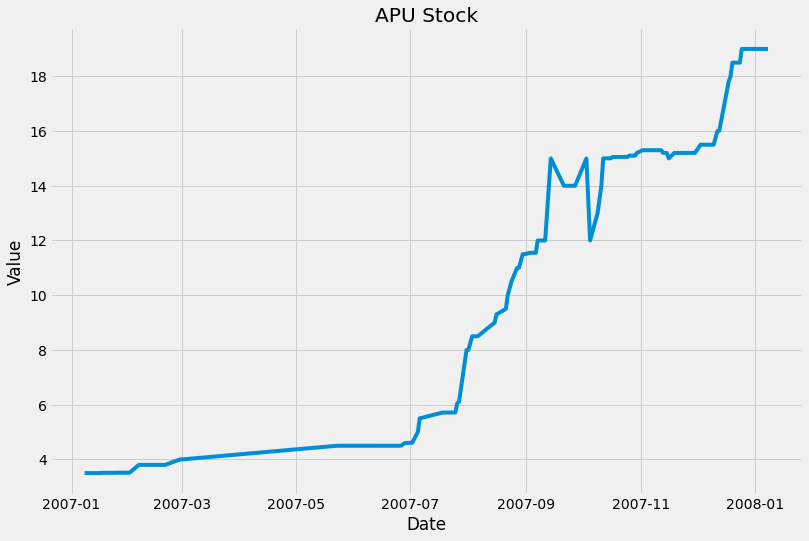

In [68]:
date_setter(2007,1,8,2008,1,8)

In [80]:
pd.DatetimeIndex(apu_stock_df['date']).year.unique().sort_values()

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019, 2020, 2021],
           dtype='int64', name='date')

In [81]:
pd.DatetimeIndex(apu_stock_df['date']).month.unique().sort_values()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='date')

In [ ]:
def date_setter(min_year, min_month, min_day, max_year, max_month, max_day):
    apu_stock_df = pd.read_csv("apuStock.csv", thousands=",")
    apu_stock_df = apu_stock_df.drop(columns ="volume", axis=1)
    apu_stock_df['date'] = pd.to_datetime(apu_stock_df['date'])
    min_date = pd.to_datetime(str(min_year)+"-"+str(min_month)+"-"+str(min_day))
    max_date = pd.to_datetime(str(max_year)+"-"+str(max_month)+"-"+str(max_day))
    apu_stock_df = apu_stock_df[(apu_stock_df['date'] >= min_date) & (apu_stock_df['date'] <= max_date)]
    plt.plot(apu_stock_df['date'], apu_stock_df['value'])
    plt.title("APU Stock")
    plt.xlabel("Date")
    plt.ylabel("Value")
    return        
date_setter(min_year, min_month, min_day, max_year, max_month, max_day)

In [93]:
(apu_stock_df[(apu_stock_df['date'] >= "2007-7-1") & (apu_stock_df['date'] <= "2009-7-1")]).dtypes

date     datetime64[ns]
value           float64
dtype: object

In [94]:
min_year+min_month+min_day

NameError: name 'min_year' is not defined

In [142]:
apu_forecast = pd.read_csv("APU Forecast.csv", thousands=",")

In [143]:
tae = apu_forecast[(apu_forecast['Breakdown'] == "Total Asset") | (apu_forecast['Breakdown'] == "Total Equity")].reset_index().drop(columns="index", axis=1)

In [144]:
tae = pd.DataFrame.transpose(tae)

In [145]:
tae = tae.reset_index()

In [146]:
tae.columns = tae.iloc[0]

In [147]:
tae = tae.drop([0], axis=0)

In [148]:
tae

,Breakdown,Total Asset,Total Equity
1,2015,305672207.00000,145494485.30000
2,2016,291069787.30000,143185471.80000
3,2017,632914478.60000,506925661.70000
4,2018,530446697.70000,444178066.80000
5,2019,545507369.40000,481282802.60000
6,2020,556246098.10000,461951721.80000
7,2021F,567371020.10000,451823582.70000
8,2022F,578718440.50000,454346262.90000
9,2023F,590292809.30000,456919396.70000
10,2024F,602098665.50000,459543993.10000


In [159]:
tae['Breakdown'] = tae['Breakdown'].str[0:4].astype(int)

In [160]:
import plotly.express as px 

In [234]:
import plotly.graph_objects as go

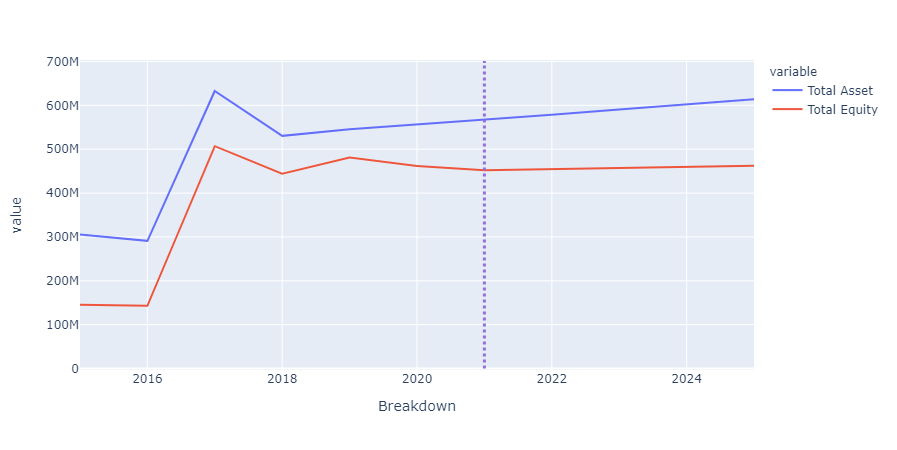

In [170]:
fig = px.line(tae, x='Breakdown', y=['Total Asset', 'Total Equity'])
fig.add_shape(type="line", x0=2021, y0=0, x1=2021, y1=700000000,line=dict(color="MediumPurple",width=3,dash="dot",))
fig.show()

In [254]:
ca = apu_forecast[1:5]

In [262]:
ca['Average'] = (ca['2015']+ca['2016']+ca['2017']+ca['2018']+ca['2019']+ca['2020']+ca['2021F']+ca['2022F']+ca['2023F']+ca['2024F']+ca['2025F'])/11

<ipython-input-262-3125d82bbc31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
ca[['Breakdown', 'Average']]

,Breakdown,Average
1,Cash,43993991.18182
2,Accounts Receivable,28859976.31818
3,Inventory,90563550.73636
4,Other current assets,22092273.63636


In [274]:
fig = px.bar(ca, x='Breakdown', y='Average', title="Average current asset breakdown")

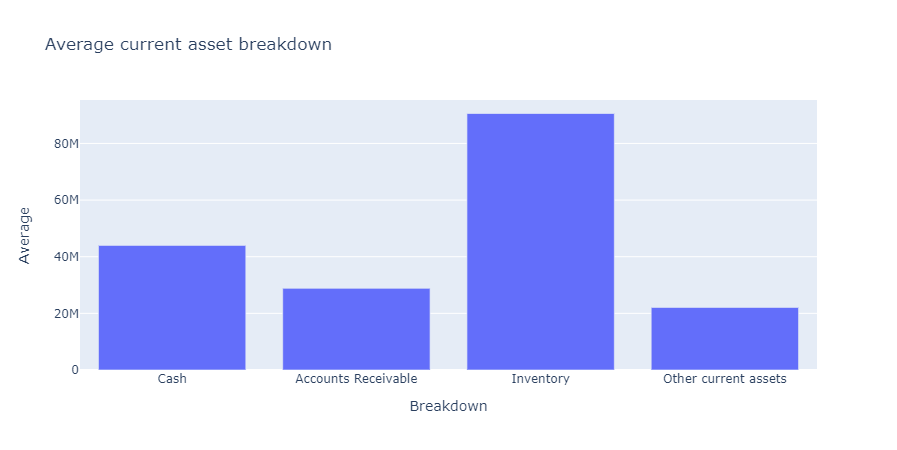

In [275]:
fig

In [276]:
apu_forecast_ins = pd.read_csv("APU Forecast ins.csv", thousands=",")

In [277]:
apu_forecast_ins

,Breakdown,2015,2016,2017,2018,2019,2020,2021F,2022F,2023F,2024F,2025F
0,Sales,210111177.20000,208055307.70000,234606134.20000,512928466.00000,472634238.00000,491204352.50000,501028439.60000,511049008.30000,521269988.50000,531695388.30000,542329296.00000
1,COGS,146597508.10000,142012623.00000,164218127.40000,287403788.80000,260200063.00000,257126020.90000,310184250.70000,316387935.70000,322715694.40000,329170008.30000,335753408.50000
2,Gross Profit,63513669.10000,66042684.70000,70388006.80000,225524677.20000,212434175.00000,234078331.60000,190844188.90000,194661072.60000,198554294.10000,202525380.00000,206575887.60000
3,Operating Income,1392693.30000,1237387.20000,1292294.80000,3694914.30000,3595733.50000,3998986.00000,3426761.20000,3495296.40000,3565202.40000,3636506.40000,3709236.60000
4,Operating Expense,37891349.60000,37070867.50000,39976344.50000,150084829.30000,115755878.40000,122575442.50000,109890235.20000,112088039.90000,114329800.70000,116616396.90000,118948724.70000
5,Other gains (loss),-10003116.90000,-26484678.50000,2400063.70000,-2051508.00000,-1726219.20000,-1008230.50000,-14561501.70000,-14852731.80000,-15149786.30000,-15452782.10000,-15761837.60000
6,EBT,17011895.90000,3724525.90000,34104020.80000,77083254.20000,98547810.90000,114493644.60000,69819213.20000,71215597.50000,72639909.40000,74092707.60000,75574561.80000
7,Net Income,10670168.50000,2850993.30000,24871941.70000,57851658.70000,76112894.90000,89026939.30000,52238154.10000,53282917.20000,54348575.50000,55435547.10000,56544258.00000


In [282]:
income = apu_forecast_ins[(apu_forecast_ins['Breakdown'] == "Gross Profit") | (apu_forecast_ins['Breakdown'] == "Net Income")].reset_index().drop(columns="index", axis=1)
income = pd.DataFrame.transpose(income).reset_index()
income.columns = income.iloc[0]
income = income.drop([0], axis=0)

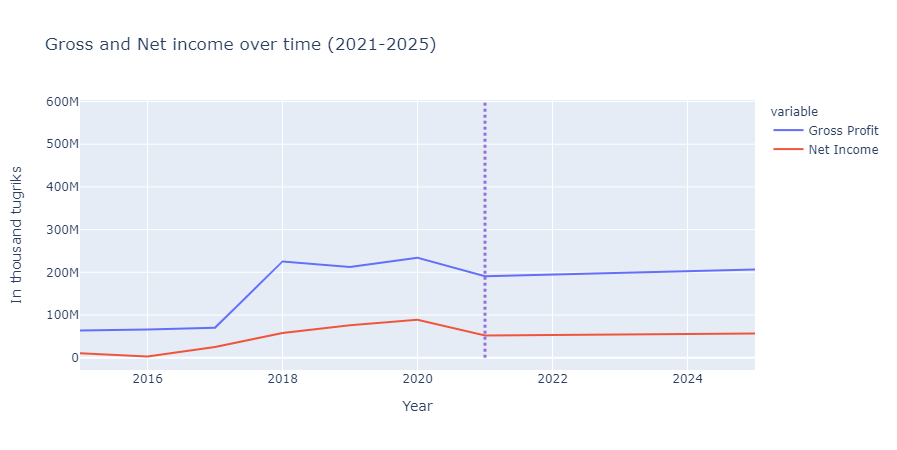

In [283]:
income['Breakdown'] = income['Breakdown'].str[0:4].astype(int)
fig = px.line(income, x='Breakdown', y=['Gross Profit', 'Net Income'], title="Gross and Net income over time (2021-2025)", labels={"Breakdown": "Year", "value": "In thousand tugriks"})
fig.add_shape(type="line", x0=2021, y0=0, x1=2021, y1=600000000,line=dict(color="MediumPurple",width=3,dash="dot",))
#st.plotly_chart(fig)

In [3]:
    apu_forecast_ins = pd.read_csv("APU Forecast ins.csv", thousands=",")
    apu_forecast = pd.read_csv("APU Forecast.csv", thousands=",")
    
    balance_ratio = apu_forecast[['Breakdown', '2020']].dropna()
    state_ratio = apu_forecast_ins[['Breakdown', '2020']].dropna()

In [4]:
balance_ratio

,Breakdown,2020
0,Current Asset,204805341.30000
1,Cash,63059533.20000
2,Accounts Receivable,28028748.70000
3,Inventory,83531865.10000
4,Other current assets,30185194.30000
5,Fixed Asset,351440756.80000
6,"Plant, Property and Equipment",262846190.70000
7,Other fixed assets,88594566.10000
8,Total Asset,556246098.10000
9,Current Liability,65847555.90000


In [5]:
state_ratio

,Breakdown,2020
0,Sales,491204352.50000
1,COGS,257126020.90000
2,Gross Profit,234078331.60000
3,Operating Income,3998986.00000
4,Operating Expense,122575442.50000
5,Other gains (loss),-1008230.50000
6,EBT,114493644.60000
7,Net Income,89026939.30000


In [18]:
k = state_ratio[state_ratio['Breakdown'] == "COGS"]['2020'].values
k

array([2.57126021e+08])

In [9]:
balance_ratio[balance_ratio['Breakdown'] == "Inventory"]['2020']

3   83531865.10000
Name: 2020, dtype: float64

In [26]:
a = 365/((state_ratio[state_ratio['Breakdown'] == "COGS"]['2020'].values) / (balance_ratio[balance_ratio['Breakdown'] == "Inventory"]['2020'].values))
a1 = a[0]

In [27]:
a1

118.57660556788866

In [28]:
mse_index = pd.read_csv("mse index.csv", thousands=",")

In [61]:
mse_index.tail(10)

,Ratio Names,MSE A Index
10,Debt to equity,0.63000
11,Financial leverage,1.84000
12,Gross profit margin,0.24000
13,Pretax margin,0.13000
14,Net profit margin,0.12000
15,ROA,0.08000
16,ROE,0.19000
17,P/E,22.89000
18,P/BV,1.32000
19,EPS,33.11000


In [31]:
mse_index = mse_index[['Ratio Names', 'MSE A Index']].dropna()

In [36]:
mse = mse_index[mse_index['Ratio Names'] == "Days of inventory on hands (DOH)"]['MSE A Index'][0]

In [35]:
a1

118.57660556788866

In [46]:
if a1 > mse:
    a = "Higher"
else:
    a = "Lower"

In [47]:
a

'Lower'

In [54]:
mse_index[mse_index['Ratio Names'] == "Days of Sales outstanding (DSO)"]['MSE A Index'][1]

47.84

In [56]:
balance_ratio[balance_ratio['Breakdown'] == "Fixed Asset"]['2020']

5   351440756.80000
Name: 2020, dtype: float64

In [57]:
state_ratio[state_ratio['Breakdown'] == "Sales"]['2020']

0   491204352.50000
Name: 2020, dtype: float64

In [5]:
mse_index = pd.read_csv("mse index.csv", thousands=",")

In [6]:
mse_index = mse_index[['Ratio Names', 'MSE A Index']].dropna()

In [7]:
mse_index

,Ratio Names,MSE A Index
0,Days of inventory on hands (DOH),211.22422
1,Days of Sales outstanding (DSO),47.83963
2,Number of days of payables,78.03955
3,Fixed asset turnover,4.18931
4,Total asset turnover,0.82152
5,Current,1.80889
6,Quick,0.75654
7,Cash conversion cycle,180.89226
8,Debt to asset,0.18562
9,Debt to capital,0.20378


In [40]:
apu_stock_df = pd.read_csv("apuStock.csv", thousands=",")

In [48]:
apu_stock_df['date'] = pd.to_datetime(apu_stock_df['date'])

In [64]:
pps = apu_stock_df[pd.DatetimeIndex(apu_stock_df['date']).year == 2020][-1:]['value'].reset_index()

In [67]:
pps = pps['value'][0]

605.15

In [ ]:
apu_stock_df = pd.read_csv("apuStock.csv", thousands=",")
apu_stock_df['date'] = pd.to_datetime(apu_stock_df['date'])
pps = apu_stock_df[pd.DatetimeIndex(apu_stock_df['date']).year == 2020][-1:]['value'].reset_index()
pps = pps['value'][0]